In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("./image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

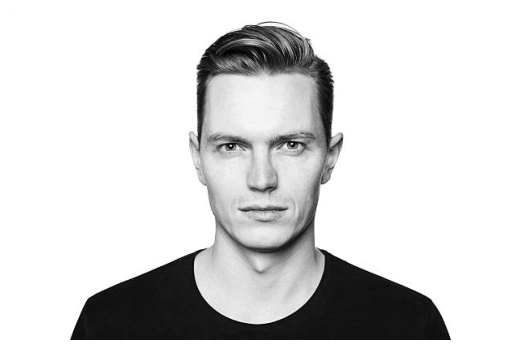

In [23]:
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()

In [24]:
def apply_mask(image, mask):
    filtered_image = np.zeros_like(image)
    height, width = image.shape
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i-1:i+2, j-1:j+2]
            value = np.sum(region * mask)
            filtered_image[i, j] = np.clip(value, 0, 255)
    return filtered_image

In [25]:
laplacian_mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
gaussian_mask = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

In [26]:
laplacian_image = apply_mask(image, laplacian_mask)
gaussian_image = apply_mask(image, gaussian_mask)
LoG_image1 = apply_mask(gaussian_image, laplacian_mask)
LoG_image2 = apply_mask(laplacian_image, gaussian_mask)

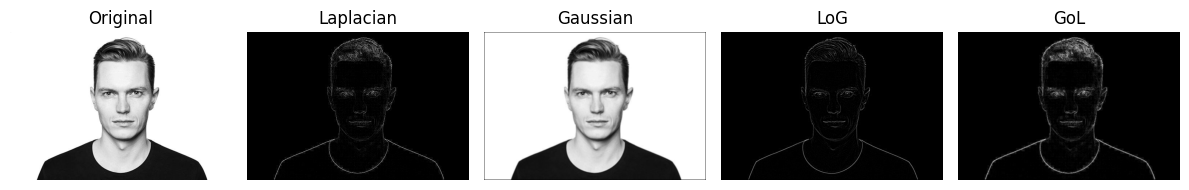

In [27]:
new_images = [image, laplacian_image, gaussian_image, LoG_image1, LoG_image2]
titles = ["Original", "Laplacian", "Gaussian", "LoG", "GoL"]

fig, axes = plt.subplots(1, 5, figsize=(12, 6))

for ax, image, title in zip(axes, new_images, titles):
    ax.imshow(image, cmap="gray")
    ax.axis('off')
    ax.set_title(title)
plt.tight_layout()

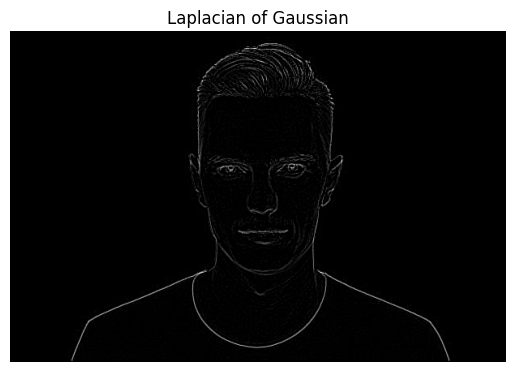

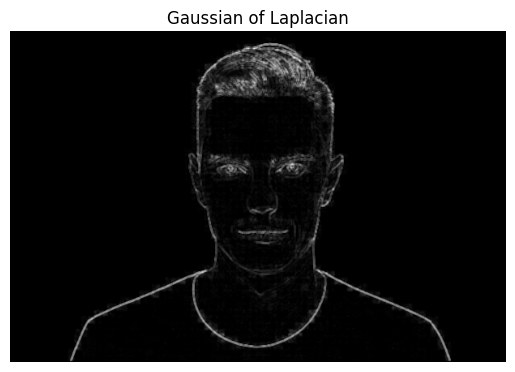

In [31]:
plt.imshow(LoG_image1, cmap="gray")
plt.title("Laplacian of Gaussian")
plt.axis('off')
plt.show()

plt.imshow(LoG_image2, cmap="gray")
plt.title("Gaussian of Laplacian")
plt.axis('off')
plt.show()

In [39]:
LoG_mask = np.array([[0, 0, -1, 0, 0],
                     [0, -1, -2, -1, 0],
                     [-1, -2, 16, -2, -1],
                     [0, -1, -2, -1, 0],
                     [0, 0, -1, 0, 0]])

In [40]:
def log_apply_mask(image, mask):
    filtered_image = np.zeros_like(image)
    height, weight = image.shape
    for i in range(2, height - 2):
        for j in range(2, weight - 2):
            region = image[i-2:i+3, j-2:j+3]
            value = np.sum(region * mask)
            filtered_image[i, j] = np.clip(value, 0, 255)
    return filtered_image

In [41]:
approximated_LoG_image = log_apply_mask(image, LoG_mask)

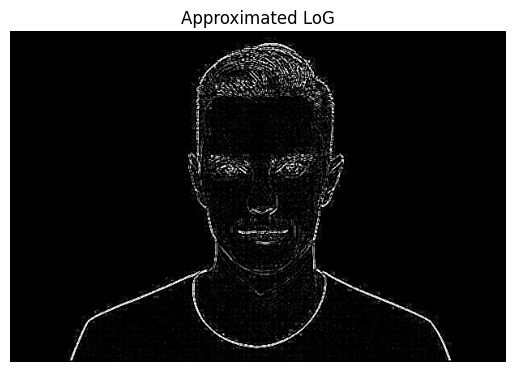

In [42]:
plt.imshow(approximated_LoG_image, cmap="gray")
plt.title("Approximated LoG")
plt.axis('off')
plt.show()

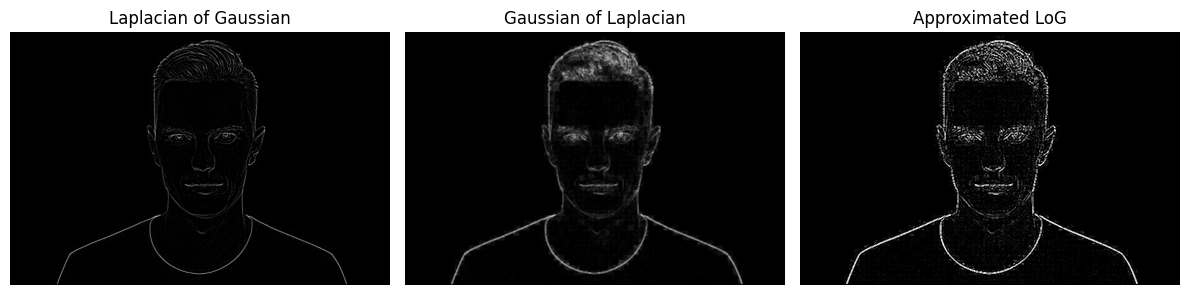

In [43]:
log = [LoG_image1, LoG_image2, approximated_LoG_image]
title = ['Laplacian of Gaussian', 'Gaussian of Laplacian', 'Approximated LoG']

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for ax, image, title in zip(axes, log, title):
    ax.imshow(image, cmap="gray")
    ax.axis('off')
    ax.set_title(title)
plt.tight_layout()